<a href="https://colab.research.google.com/github/saileshraturi/AutoRegression-SimpleRNN-on-Sinwave/blob/master/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.layers import Input,Dense,SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

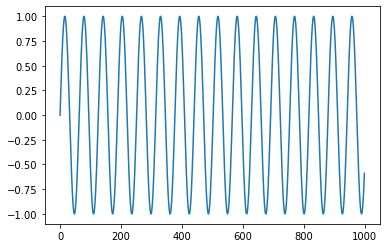

In [34]:
#Original Data

series = np.sin(0.1*np.arange(1000)) #+ np.random.randn(200)*0.1
plt.plot(series)

In [35]:
#Build the Data
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1,T)  # reshaping list to array of dimension(N * D) as Linear regression accept input as 2D array
Y = np.array(Y)
N = len(X)
print(N,X.shape,Y.shape)

990 (990, 10) (990,)


In [36]:
#Build the Auto Regressive model
i = Input(shape = (T,))
o = Dense(1)(i)
model=Model(i,o)

#Compile the model
model.compile(loss = 'mse',
    optimizer = Adam(lr = 0.1),
              )
#Train the model First half and second half 
r = model.fit(X[:-N//2],Y[:-N//2],
          epochs = 80,
          validation_data = (X[-N//2:],Y[-N//2:]),
          )

Epoch 1/80
16/16 [==============================] - 0s 6ms/step - loss: 0.1548 - val_loss: 0.0804
Epoch 2/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0270 - val_loss: 0.0173
Epoch 3/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.0040
Epoch 4/80
16/16 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 6.8167e-04
Epoch 5/80
16/16 [==============================] - 0s 4ms/step - loss: 3.1580e-04 - val_loss: 9.8347e-05
Epoch 6/80
16/16 [==============================] - 0s 4ms/step - loss: 1.4052e-04 - val_loss: 4.2930e-06
Epoch 7/80
16/16 [==============================] - 0s 4ms/step - loss: 2.9915e-05 - val_loss: 6.9735e-06
Epoch 8/80
16/16 [==============================] - 0s 4ms/step - loss: 9.0697e-06 - val_loss: 5.5353e-06
Epoch 9/80
16/16 [==============================] - 0s 4ms/step - loss: 1.1781e-06 - val_loss: 2.1481e-07
Epoch 10/80
16/16 [==============================] - 0s 4ms/step - loss: 1

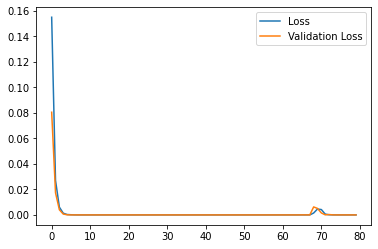

In [37]:
#Visualizing loss
plt.plot(r.history["loss"],label = "Loss")
plt.plot(r.history["val_loss"],label = "Validation Loss")
plt.legend()

In [0]:
#Forecast

validation_target = Y[-N//2:]
validation_prediction = []

i = -N//2

while len(validation_prediction) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0] #Single input value to feed into model
  i += 1

  validation_prediction.append(p)


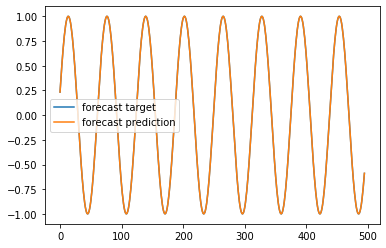

In [39]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_prediction, label='forecast prediction')
plt.legend()

In [0]:
#multistep forecast

validation_prediction = []
validation_target = Y[-N//2:]

last_x = X[-N//2]

while len(validation_prediction) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]
  validation_prediction.append(p)

  last_x = np.roll(last_x,-1)
  last_x[-1] = p


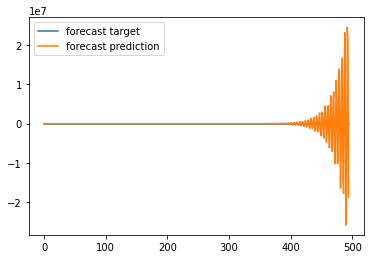

In [41]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_prediction, label='forecast prediction')
plt.legend()

In [48]:
#Try Simple RNN Model

i = Input(shape = (T,1))
o = SimpleRNN(15,activation = 'relu')(i)
o = Dense(1)(o)
model = Model(i,o)

#compile the model
model.compile(optimizer = Adam(lr=0.001),
    loss = 'mse',
    )
#Train the model
model.fit(X[:-N//2],Y[:-N//2],
          epochs=80,
          validation_data=(X[-N//2:],Y[-N//2:]),
          )              

Epoch 1/80
16/16 [==============================] - 0s 16ms/step - loss: 1.8593 - val_loss: 1.6310
Epoch 2/80
16/16 [==============================] - 0s 22ms/step - loss: 1.4423 - val_loss: 1.3239
Epoch 3/80
16/16 [==============================] - 0s 9ms/step - loss: 1.1662 - val_loss: 1.0901
Epoch 4/80
16/16 [==============================] - 0s 9ms/step - loss: 0.9410 - val_loss: 0.8312
Epoch 5/80
16/16 [==============================] - 0s 10ms/step - loss: 0.6827 - val_loss: 0.5880
Epoch 6/80
16/16 [==============================] - 0s 10ms/step - loss: 0.4830 - val_loss: 0.4346
Epoch 7/80
16/16 [==============================] - 0s 10ms/step - loss: 0.3557 - val_loss: 0.2907
Epoch 8/80
16/16 [==============================] - 0s 10ms/step - loss: 0.2169 - val_loss: 0.1667
Epoch 9/80
16/16 [==============================] - 0s 10ms/step - loss: 0.1243 - val_loss: 0.0935
Epoch 10/80
16/16 [==============================] - 0s 10ms/step - loss: 0.0798 - val_loss: 0.0651
Epoch 11/80

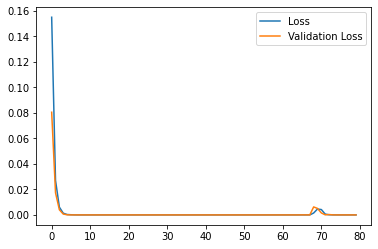

In [49]:
#Visualizing loss
plt.plot(r.history["loss"],label = "Loss")
plt.plot(r.history["val_loss"],label = "Validation Loss")
plt.legend()

In [0]:
#Single Step Forecast

validation_target = Y[-N//2:]
validation_prediction = []

i = -N//2

while len(validation_prediction) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1,1))[0,0] #Single input value to feed into model
  i += 1

  validation_prediction.append(p)

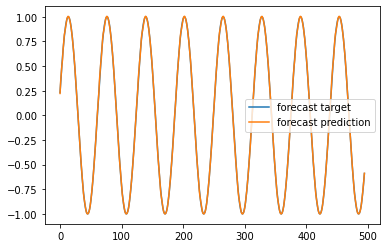

In [51]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_prediction, label='forecast prediction')
plt.legend()

In [0]:
#multistep forecast

validation_prediction = []
validation_target = Y[-N//2:]

last_x = X[-N//2]

while len(validation_prediction) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1,1))[0,0]
  validation_prediction.append(p)

  last_x = np.roll(last_x,-1)
  last_x[-1] = p

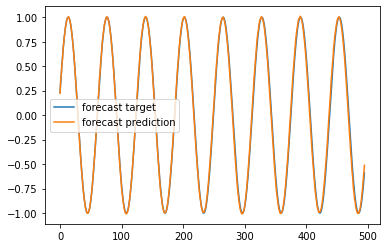

In [53]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_prediction, label='forecast prediction')
plt.legend()